In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1: Scooby Doo monsters

The [Scooby-Doo](https://en.wikipedia.org/wiki/Scooby-Doo) cartoon series featured teenagers Fred Jones, Daphne Blake, Velma Dinkley, and Shaggy Rogers, and their talking Great Dane named Scooby-Doo, who solve mysteries involving supposedly supernatural creatures through a series of antics and missteps.

![Scooby-Doo](scoobydoo.png)

In [105]:
# load data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/scoobydoo.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,monster_name,...,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
0,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,1969-09-13,21,TV Series,Black Knight,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,1969-09-20,22,TV Series,Ghost of Cptn. Cuttler,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,1969-09-27,21,TV Series,Phantom,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,1969-10-04,21,TV Series,Miner 49'er,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,1969-10-11,21,TV Series,Indian Witch Doctor,...,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


The **goal** is to predict which Scooby Doo monsters are real and which are not (the `monster_real` column), **based on the year each episode was aired and the episode rating** (the imdb column).

In [106]:
data['monster_real'].value_counts()

fake    404
real    112
Name: monster_real, dtype: int64

**Part 1:** Add a `year` column with the year each episode was aired.

In [107]:
data['year'] = pd.to_datetime(data.date_aired).dt.year

**Part 2:** Drop the rows that have a missing `monster_real`, `year` or `imdb` values.

In [111]:
# your code here
#data.loc[(data.monster_real.isnull()) | (data.year.isnull()) | (data.imdb.isnull())]
#data = data.drop()
data.dropna(subset=['monster_real', 'year', 'imdb'], inplace=True, axis=0)

In [112]:
data.head()

,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,monster_name,...,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va,year
0,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,1969-09-13,21,TV Series,Black Knight,...,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick,1969
1,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,1969-09-20,22,TV Series,Ghost of Cptn. Cuttler,...,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick,1969
2,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,1969-09-27,21,TV Series,Phantom,...,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick,1969
3,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,1969-10-04,21,TV Series,Miner 49'er,...,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick,1969
4,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,1969-10-11,21,TV Series,Indian Witch Doctor,...,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick,1969


**Part 3:** Define the feature matrix X (`year` and `imdb` columns) and the target vector y (`monster_real` column) from the dataframe

In [131]:
# your code here
X = data[['year', 'imdb']]
y = data.monster_real
print(len(X))
print(len(y))

501
501


**Part 4:** Plot the data points (i.e., plot `year` values against `imdb` values). Color each point in the scatter plot according to whether the monster is real or fake.

<AxesSubplot:xlabel='year', ylabel='imdb'>

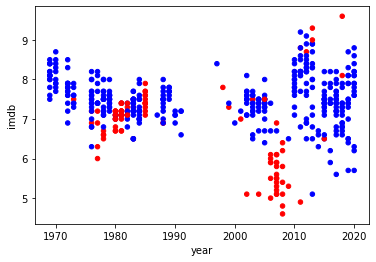

In [139]:
# your code here

colors = {'real':'red', 'fake':'blue'}
X.plot.scatter(x='year', y='imdb', c=y.map(colors))

**Part 5:** Train a classification tree (with `max_depth=5`) on the data. 

In [141]:
# your code here
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=5)

**Part 6**: Use your classification tree to predict the y vector, and compute the confusion matrix.

In [143]:
# your code here
from sklearn.metrics import confusion_matrix
y_pred = tree_clf.predict(X)


confusion_matrix(y, y_pred)

array([[384,   5],
       [ 28,  84]], dtype=int64)

**Part 7:** Use the [`draw_lassification_regions function`](https://github.com/um-perez-alvaro/Data-Science-Practice/blob/master/Jupyter%20Notebooks/Classification/notebooks/functions.py) the classification tree results

In [ ]:
# draw_classification_regions function
# NOTE: the draw_classification function is at the very bottom since it is so big

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


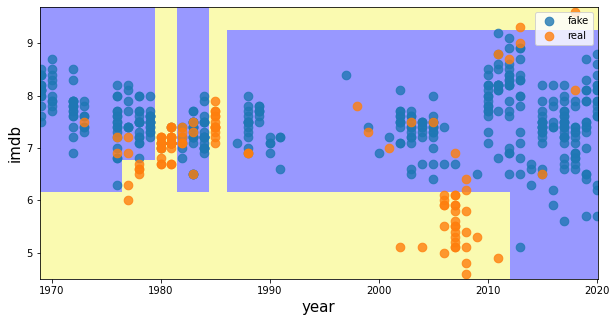

In [145]:
# your code here
draw_classification_regions(X,y,tree_clf)

**Part 8:** Repeat parts 5--7 with `max_depth=20`.

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


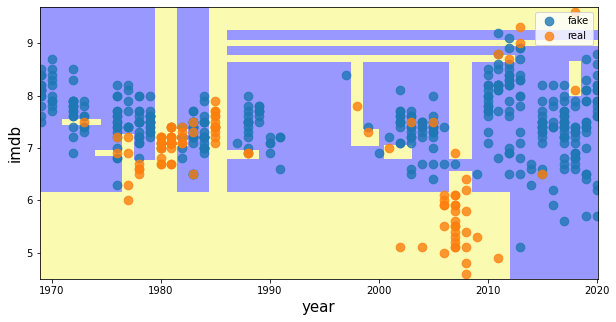

In [147]:
# your code here
tree_clf = DecisionTreeClassifier(max_depth=20)
tree_clf.fit(X,y)

y_pred = tree_clf.predict(X)

confusion_matrix(y, y_pred)
draw_classification_regions(X,y,tree_clf)

In [148]:
confusion_matrix(y, y_pred)

array([[382,   7],
       [ 10, 102]], dtype=int64)

In [144]:
import matplotlib.pyplot as plt
import numpy as np
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()